# Proyecto 2 
## Limpieza de datos


In [20]:
# Importar librerias
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import keras
import tensorflow as tf

In [21]:
# Cargar los datos y visualizarlos
data = pd.read_csv('bank-full.csv',sep=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [22]:
# Tamaño de los datos
data.shape

(45211, 17)

## Tipo de datos

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [24]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [25]:
# Número de valores vacios
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Análisis de datos atípicos

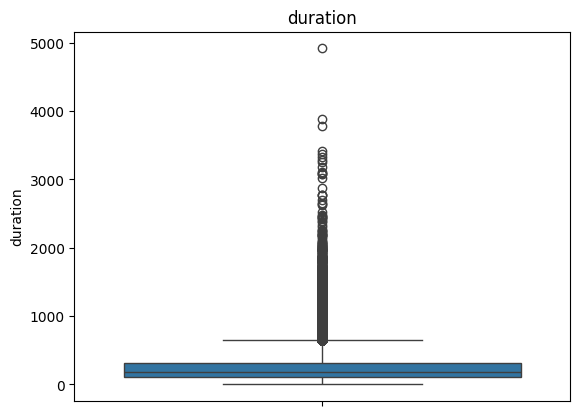

In [26]:
# Variable duration
sns.boxplot(y=data['duration'])
plt.title('duration')
plt.show()

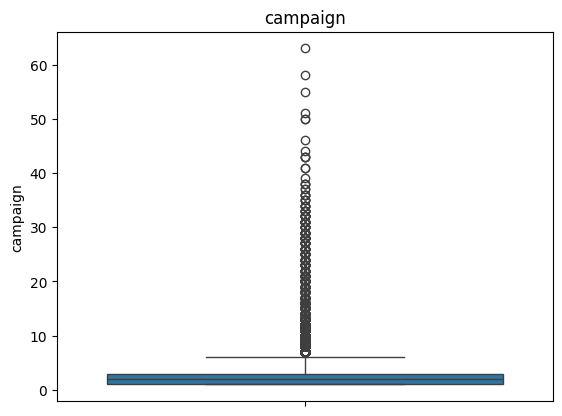

In [27]:
# Variable campaign
sns.boxplot(y=data['campaign'])
plt.title('campaign')
plt.show()

## Convertir variable pdays

In [28]:
# Convertir los valores de pdays: 0 si es -1, 1 de lo contrario
data['pdays'] = data['pdays'].apply(lambda x: 0 if x == -1 else 1)

data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,0,unknown,no


## Nuevo archivo dummies

In [29]:
# Convertir todas las variables categóricas a variables dummies
data_dummies = pd.get_dummies(data)

data_dummies.to_excel('Datos_dummies.xlsx', index=False)

## Convertir variables 'housing', 'loan', 'default' y 'y' de 'yes' y 'no' a 0 y 1

In [30]:
# Convertir 'yes' a 1 y 'no' a 0
data['housing'] = data['housing'].apply(lambda x: 1 if x == 'yes' else 0)
data['loan'] = data['loan'].apply(lambda x: 1 if x == 'yes' else 0)
data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)
data['default'] = data['default'].apply(lambda x: 1 if x == 'yes' else 0)
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0,0,unknown,0


## Variable 'month' pasarla a valores numéricos

In [31]:
# Crear un diccionario para mapear las abreviaturas de los meses a números
months_to_numbers = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

# Convertir las abreviaturas de los meses a números utilizando map()
data['month'] = data['month'].map(months_to_numbers)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,0,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,0,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,0,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,0,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,0,0,unknown,0


## Nuevo archivo excel con la nueva variables pdays y orden de variables organizadas

Definimos listas para las variables categóricas enteras, categóricas string y numéricas.

In [32]:
cat_int_feats = ['default', 'housing', 'loan', 'pdays']

In [33]:
cat_str_feats = ['job','marital','education','contact','poutcome']

In [34]:
num_feats = ['age','balance', 'day', 'month', 'duration', 'campaign', 'previous']

Agregamos las listas de categorías

In [35]:
feats_ordered = cat_int_feats+cat_str_feats+num_feats

Reordenamos el dataframe de acuerdo con el tipo de variable

In [36]:
data = data[feats_ordered+['y']]

In [37]:
data.head()

,default,housing,loan,pdays,job,marital,education,contact,poutcome,age,balance,day,month,duration,campaign,previous,y
0,0,1,0,0,management,married,tertiary,unknown,unknown,58,2143,5,5,261,1,0,0
1,0,1,0,0,technician,single,secondary,unknown,unknown,44,29,5,5,151,1,0,0
2,0,1,1,0,entrepreneur,married,secondary,unknown,unknown,33,2,5,5,76,1,0,0
3,0,1,0,0,blue-collar,married,unknown,unknown,unknown,47,1506,5,5,92,1,0,0
4,0,0,0,0,unknown,single,unknown,unknown,unknown,33,1,5,5,198,1,0,0


## Nuevo csv para el modelo

In [38]:
# Guardar el DataFrame en un archivo CSV
data.to_csv('bank-full-modelo.csv', index=False)